# 🌍 Satellite Image Classification with CNN
This notebook trains a Convolutional Neural Network (CNN) to classify satellite images using the EuroSAT dataset.

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 89s 129ms/step - accuracy: 0.3922 - loss: 1.5630 - val_accuracy: 0.7159 - val_loss: 0.7726
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.7100 - loss: 0.8018 - val_accuracy: 0.7317 - val_loss: 0.7053
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.7691 - loss: 0.6386 - val_accuracy: 0.7600 - val_loss: 0.6569
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 0.7993 - loss: 0.5605 - val_accuracy: 0.7506 - val_loss: 0.6780
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 73s 108ms/step - accuracy: 0.8348 - loss: 0.4668 - val_accuracy: 0.7609 - val_loss: 0.6827
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 73s 108ms/step - accuracy: 0.8634 - loss: 0.3907 - val_accuracy: 0.8011 - val_loss: 0.5679
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 75s 112ms/step - accuracy: 0.8868 - loss: 0.3296 - val_accuracy: 0.8080 - val_loss: 0.56

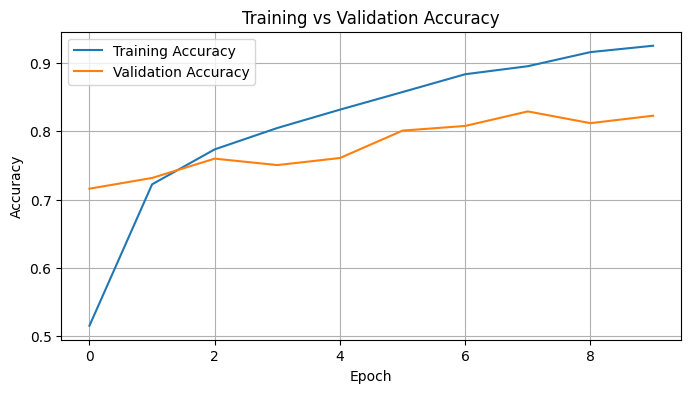

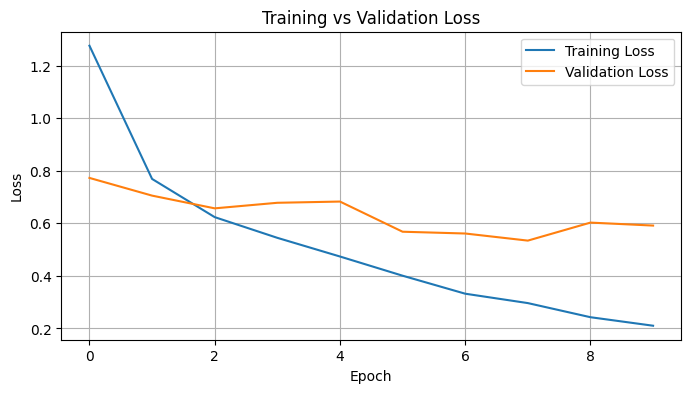

169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.81      0.91      0.86       600
              Forest       0.93      0.95      0.94       600
HerbaceousVegetation       0.69      0.78      0.73       600
             Highway       0.68      0.60      0.64       500
          Industrial       0.92      0.90      0.91       500
             Pasture       0.81      0.77      0.79       400
       PermanentCrop       0.64      0.69      0.66       500
         Residential       0.94      0.92      0.93       600
               River       0.81      0.63      0.71       500
             SeaLake       0.97      0.97      0.97       600

            accuracy                           0.82      5400
           macro avg       0.82      0.81      0.81      5400
        weighted avg       0.82      0.82      0.82      5400

Confusion Matrix:
[[547   4   2   6   0  10  18   0   8   5]
 [ 

In [8]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Set parameters
data_path = './data/2750'
img_size = (64, 64)
batch_size = 32
epochs = 10

# Prepare the data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build the CNN model
model = models.Sequential([
    Input(shape=(64, 64, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Dynamic output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model and print classification report
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
